Olá, Rosana

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Código e anaĺises maduras
- Dashboard está muito bom
    
<span class="text-danger">Porém, há espaço para melhorias: </span>
 * <span class="text-danger"> avaliar o descarte de nans, avaliar igualdade de variâncias </span>


Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho. 


</div>





<div class="alert alert-block alert-success">
<b> Comentário Geral do Revisor Final: </b> <a class="tocSkip"></a>

Tudo certo agora. Desejo sucesso na jornada. Parabéns pelo empenho.
</div>

# **Telecomunicações**

## Introduction

A CallMeMaybe é uma empresa de telefonia virtual que atende organizações com grande volume de chamadas.
Este projeto tem como objetivo identificar operadores ineficientes com base em chamadas perdidas,
tempo de espera e volume de chamadas de saída.

## Analyses Objectives 

- Realizar analise exploratoria dos dados
- Identificar operadores ineficientes
- Testar hipoteses estatisticas
- Gerar insights acionaveis para supervisores


O dataset compactado **`telecom_dataset_new.csv`** contém as seguintes colunas:

- **`user_id`**: ID da conta do cliente
- **`date`**: data em que as estatísticas foram coletadas
- **`direction`**: “direção” da chamada (`out` para chamadas **saídas**, `in` para chamadas **entrantes**)
- **`internal`**: indica se a chamada foi **interna** (entre operadores de um mesmo cliente)
- **`operator_id`**: identificador do operador
- **`is_missed_call`**: indica se foi uma **chamada perdida**
- **`calls_count`**: número de chamadas
- **`call_duration`**: duração da chamada (sem incluir o tempo de espera)
- **`total_call_duration`**: duração total da chamada (incluindo o tempo de espera)


O conjunto de dados **`telecom_clients.csv`** contem as seguintes colunas:

- **`user_id`**: ID do cliente
- **`tariff_plan`**: plano tarifário atual do cliente
- **`date_start`**: data de registro do cliente

# Analise Exploratoria

### **Importacao de Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import levene, ttest_ind

### **Carregamento de Dados

In [2]:
#Carregando os datasets
telecom_dataset = pd.read_csv('/datasets/telecom_dataset.csv')
telecom_clients = pd.read_csv('/datasets/telecom_clients.csv')

### **Visao Geral dos Datasets

In [3]:
#Informacoes gerais do dataset 'telecom_new'
print('\n --- Primeiras linhas do Dataset ---')
print(telecom_dataset.head())
print('\n--- Informacoes Gerais ---')
print(telecom_dataset.info())


 --- Primeiras linhas do Dataset ---
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  

--- Informacoes Gerais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data 

In [4]:
print('\n --- Descricao do Dataset ---')
print(telecom_dataset.describe())


 --- Descricao do Dataset ---
             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900788.000000      1.000000       0.000000   
50%    167162.000000  913938.000000      4.000000      38.000000   
75%    167819.000000  937708.000000     12.000000     572.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         53902.000000  
mean           1157.133297  
std            4403.468763  
min               0.000000  
25%              47.000000  
50%             210.000000  
75%             902.000000  
max          166155.000000  


In [5]:
#Informacoes Gerais do dataset 'telecom_clients'

print('\n --- Primeiras linhas do Dataset ---')
print(telecom_clients.head())
print('\n--- Informacoes Gerais ---')
print(telecom_clients.info())


 --- Primeiras linhas do Dataset ---
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16

--- Informacoes Gerais ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None


In [6]:
print('\n --- Descricao do Dataset ---')
print(telecom_clients.describe())


 --- Descricao do Dataset ---
             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000


#### Conclusao da Analise Exploratoria Inicial

53.902 registros de chamadas, 9 variaveis e uma base suficientemente grande para analise estatisticas robustas.

Os dados sao adequados para resposnder ao problema, Ha consistencias esperadas, comuns em dados reais, nenhum problema impeditivo foi encontrado.
o proximo passo sera a limpeza e preparacao dos dados

# Limpeza e Processamento de Dados

Garantir consistencia, preparar os dados para analise por operador e Criar metricas que o negocio precisa.

### Conversao de Tipos

In [7]:
#Conversao de dados

telecom_dataset['date'] = pd.to_datetime(telecom_dataset['date'])
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'])

#conversao para booleano
telecom_dataset['internal'] = telecom_dataset['internal'].astype('bool')

#conversao de operator_id mantendo NaN
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype('Int64')

telecom_dataset.info()
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53902 non-null  bool                                 
 4   operator_id          45730 non-null  Int64                                
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: Int6

Datas convertidas, flags booleanas consistentes, operator_id tratado e dataset pronto para criacao de metricas.

In [8]:
#Criando a coluna waiting_time
telecom_dataset['waiting_time'] = (telecom_dataset['total_call_duration'] - telecom_dataset['call_duration'])

#Verificando tempo de espera negativos
telecom_dataset[telecom_dataset['waiting_time'] < 0].shape

telecom_dataset['waiting_time'].describe()
telecom_dataset['waiting_time'].value_counts().head(10)

0     1355
2     1175
4      824
6      790
9      780
8      774
10     757
5      729
12     726
13     710
Name: waiting_time, dtype: int64

In [9]:
# Tratamento de Valores Ausentes


operator_calls = telecom_dataset.dropna(subset=['operator_id']).copy()

operator_calls.shape
operator_calls['operator_id'].nunique()


operator_calls.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
waiting_time           0
dtype: int64

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- não convém descartar operadotr_id que está como nan, pois é quase 15%
- oriento pensar numa estratégia para manter. Ex: preencher com valores diferentes daqueles já existentes para simular que um operador diferente atendeu cada uma daquelas chamadas
- Ou você pode justificar o descarte
</div>

### Tratamento de Valores Ausentes em 'operator_id'

Foi identificado que aproximadamente 15% dos registros possuem valores ausentes na coluna 'operator_id'. Esses registros correspondem a chamadas que nao puderem ser atribuidas a um operador especifico. Como o objetivo desse projeto e avaliar a eficiencia individual dos operadores nao e possivel calcular KPIs operacionais (taxa de chamadas perdidas, tempo medio  de espera e volume de chamadas) para registros sem identificacao de operador.
Dessa forma, os registros com 'operator_id' ausente foram removidos exclusivamente por analise por operador, evitando a introducao de vies ou distorcao nos indicadores calculados. Destaca-se que essas chamadas nao sao invalidas, mas sim inadequadas ao foco da analise definido neste estudo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Excelente argumentação
</div>


O Dataset 'operator_calls' nao tem valores ausentes  e todas as colunas estao completas e confiaveis.

### Preparacao dos KPIs por Operador

In [10]:
#separando tipo de chamadas

incoming_calls = operator_calls[operator_calls['direction'] =='in']
outgoing_calls = operator_calls[operator_calls['direction'] == 'out']

incoming_calls.shape
outgoing_calls.shape

(31717, 10)

## Criacao dos KPIs por Operador

Nesta etapa, sao criados os principais indicadores de desempenho (KPIs) por operador,
que serão utilizados para identificar operadores ineficientes e testar as hipoteses do projeto.

In [11]:
# Taxas de chamadas perdidas
missed_rate = (incoming_calls
    .groupby('operator_id')
    .apply(lambda x: x.loc[x['is_missed_call'], 'calls_count'].sum() / x['calls_count'].sum()).reset_index(name='missed_call_rate'))


# Tempo media de espera por operador
avg_waiting_time = (
    incoming_calls.groupby('operator_id')['waiting_time'].mean().reset_index(name='avg_waiting_time')
)

# Volume de Chamada de Saida
out_calls_volume = (outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index(name='outgoing_calls'))

Taxa de chamadas perdidas: mede a proporcao de chamadas recebidas que nao foram atendidas pelo operador. Uso: operadores com taxas mais altas indicam maior ineficiencia no atendimento.

Tempo medio de espera: tempo medio que os clientes aguardam antes de serem atendidos. Uso: Operadores com tempo medios de espera mais elevados tendem a oferecer pior experiencia ao cliente.

Volume de chamadas de saida: Quantidade total de chamadas realizadas pelo operador. Uso: baixo volume indica menor produtividade  para operadores responsaveis por chamadas ativas. 

In [12]:
# Consolidar KPIs em um unico Dataset
operator_kpis = (missed_rate.merge(avg_waiting_time, on='operator_id', how='left').merge(out_calls_volume, on='operator_id', how='left'))

operator_kpis.head()
operator_kpis.describe()
operator_kpis.isna().sum()

operator_id           0
missed_call_rate      0
avg_waiting_time      0
outgoing_calls      210
dtype: int64

## Classificacao de Operadores Ineficientes

### Principio de decisao

Um operador é considerado **ineficiente** quando apresenta desempenho insatisfatorio
em mais de um indicador, evitando classificacoes baseadas em apenas um KPI isolado.

### Criterios adotados (baseados em percentis)

- KPI | Regra |
- Taxa de chamadas perdidas | Percentil 75% mais alto |
- Tempo médio de espera | Percentil 75% mais alto |
- Chamadas de saída | Percentil 25% mais baixo |

### Justificativa do uso de percentis

- Sao **robustos a outliers**, comuns em dados operacionais
- Permitem **comparacao relativa** entre operadores
- Sao amplamente utilizados em avaliações de performance operacional

In [13]:
#Definicao dos limites baseado em percentis

missed_threshold = operator_kpis['missed_call_rate'].quantile(0.75)
waiting_threshold = operator_kpis['avg_waiting_time'].quantile(0.75)
outgoing_threshold = operator_kpis['outgoing_calls'].quantile(0.25)

missed_threshold, waiting_threshold, outgoing_threshold

(0.0065360403788351385, 58.78055555555555, 16.0)

In [14]:
#Flags de eneficientes por KPI
operator_kpis['high_missed_calls'] = (
    operator_kpis['missed_call_rate'] >= missed_threshold
)

operator_kpis['high_waiting_time'] = (
    operator_kpis['avg_waiting_time'] >= waiting_threshold
)

operator_kpis['low_outgoing_calls'] = (
    operator_kpis['outgoing_calls'] <= outgoing_threshold
)



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente o uso de percentis </div>


In [15]:
#Classificacao final do operador
operator_kpis['inefficient_operator'] = (operator_kpis[['high_missed_calls', 'high_waiting_time', 'low_outgoing_calls']].sum(axis=1)>= 2)

In [16]:
operator_kpis['inefficient_operator'].value_counts()
operator_kpis.head()

,operator_id,missed_call_rate,avg_waiting_time,outgoing_calls,high_missed_calls,high_waiting_time,low_outgoing_calls,inefficient_operator
0,879896,0.0,26.913043,1071.0,False,False,False,False
1,879898,0.0,28.203125,7856.0,False,False,False,False
2,880020,0.0,7.250000,46.0,False,False,False,False
3,880022,0.0,14.000000,211.0,False,False,False,False
4,880026,0.0,7.894737,2414.0,False,False,False,False


### Resultado da Classificação dos Operadores

A tabela acima apresenta os KPIs calculados para cada operador, bem como as flags de desempenho associadas a cada criterio analisado.

Observa-se que operadores com desempenho adequado na maioria dos indicadores nao sao classificados como ineficientes, reforcando a robustez da regra adotada, que evita julgamentos baseados em apenas um unico KPI.

## Testes Estatisticos das Hipoteses

### Hipotese 1 — Taxa de chamadas perdidas
- H₀: A media de chamadas perdidas é igual entre operadores eficientes e ineficientes
- H₁: Operadores ineficientes possuem media de chamadas perdidas maior

### Hipotese 2 — Tempo medio de espera
- H₀: O tempo medio de espera é igual entre operadores eficientes e ineficientes
- H₁: Operadores ineficientes possuem tempo medio de espera maior

### Hipotese 3 — Volume de chamadas de saida
- H₀: O numero médio de chamadas de saída é igual entre operadores eficientes e ineficientes
- H₁: Operadores ineficientes realizam menos chamadas de saída

In [17]:
#Separando operadores eficientes e ineficientes

efficient= operator_kpis[operator_kpis['inefficient_operator'] == False]
inefficient = operator_kpis[operator_kpis['inefficient_operator'] == True]

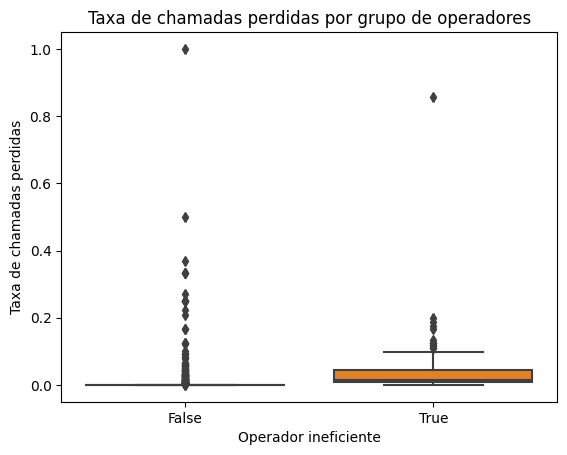

Levene (variâncias iguais?): p = 0.00072 | equal_var = False
T-test (missed_call_rate): p = 0.00196


In [18]:
#Hipotese 1 -  Taxa de chamadas perdidas

stat_missed, p_missed = ttest_ind(inefficient['missed_call_rate'], efficient['missed_call_rate'], equal_var=False)

sns.boxplot(
    data=operator_kpis,
    x='inefficient_operator',
    y='missed_call_rate'
)

plt.title('Taxa de chamadas perdidas por grupo de operadores')
plt.xlabel('Operador ineficiente')
plt.ylabel('Taxa de chamadas perdidas')
plt.show()


#grupos
x = inefficient['missed_call_rate'].dropna()
y = efficient['missed_call_rate'].dropna()

#Teste de Levene (igualdade de variancias)
stat_lev, p_lev = levene(x, y, center='median')

# Se p_lev >= 0.05 -> variancias ~ iguais (t-test)
# Se p_lev < 0.05  -> variancias diferentes (Welch)
equal_var_flag = (p_lev >= 0.05)

#Teste t (com equal_var definido  com base no Levene)
stat_missed, p_missed = ttest_ind(x, y, equal_var=equal_var_flag)

print(f"Levene (variâncias iguais?): p = {p_lev:.5f} | equal_var = {equal_var_flag}")
print(f"T-test (missed_call_rate): p = {p_missed:.5f}")

Com base no valor do test t,  observa-se que a diferenca na taxa de chamadas perdidas entre operadores eficientes e ineficientes e estatisticamente significativa ao nivel de 5%.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- oriento usar o teste Levene para avaliar igualdade de variâncias e configurar equal_var corretamente
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>



Antes de aplicar o teste t, foi utilizado o teste de Levene para avaliar se as variancias de `avg_waiting_time` são iguais entre os grupos de operadores eficientes
e ineficientes. Com base no resultado desse teste, definiu-se o parâmetro `equal_var` de forma apropriada, utilizando o teste t clássico ou o teste t de Welch, conforme necessario.

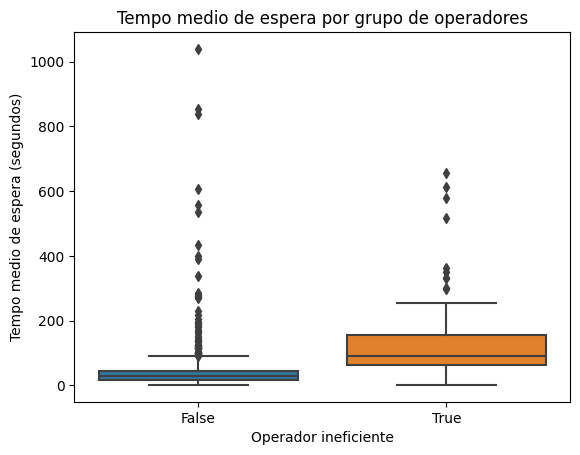

Levene (variâncias iguais?): p = 0.00001 | equal_var = False
T-test (avg_waiting_time): p = 0.00000


In [19]:
#Hipotese 2 - tempo medio de espera
stat_wait, p_wait = ttest_ind(inefficient['avg_waiting_time'], efficient['avg_waiting_time'], equal_var=False)

sns.boxplot(
    data=operator_kpis,
    x='inefficient_operator',
    y='avg_waiting_time'
)

plt.title('Tempo medio de espera por grupo de operadores')
plt.xlabel('Operador ineficiente')
plt.ylabel('Tempo medio de espera (segundos)')
plt.show()

#grupos
x = inefficient['avg_waiting_time'].dropna()
y = efficient['avg_waiting_time'].dropna()

#Teste de Levene (igualdade de variancia)
stat_lev, p_lev = levene(x, y, center='median')
equal_var_flag = (p_lev>= 0.05)

#teste t (equal_var baseado no Levene)
stat_wait, p_wait = ttest_ind(x, y, equal_var=equal_var_flag)

print(f"Levene (variâncias iguais?): p = {p_lev:.5f} | equal_var = {equal_var_flag}")
print(f"T-test (avg_waiting_time): p = {p_wait:.5f}")

Os resultados indicam que operadores classificados como ineficientes apresentam tempos medios de espera substancialmente maiores do que operadores eficientes. O boxplot evidencia essa diferenca de forma visual, enquanto o teste de Levene apontou variâncias significativamente diferentes entre os grupos, justificando o uso do teste t de Welch. O teste t confirmou que a diferenca observada é estatisticamente significativa (p < 0.05), corroborando a hipotese de que o tempo medio de espera é um fator relevante na identificação de operadores ineficientes.


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- oriento usar o teste Levene para avaliar igualdade de variâncias e configurar equal_var corretamente
</div>


<div class="alert alert-block alert-success">
<b> Comentário do revisor V2: </b> <a class="tocSkip"></a>

Correto
</div>



In [20]:
#Hipotese 3 - Volume de chamadas de saida (alguns operadores nao tem dados)
stat_out, p_out = mannwhitneyu(inefficient['outgoing_calls'].dropna(), efficient['outgoing_calls'].dropna(), alternative= 'less') #testando se ineficientes tem menos chamadas

p_missed, p_wait, p_out

(0.001959850601982692, 1.114206675766223e-09, 0.1212200450203641)

### Resultados dos Testes Estatisticos

Os testes estatisticos compararam operadores eficientes e ineficientes com base nos principais KPIs definidos no projeto.

- **Taxa de chamadas perdidas** (p = 0.0019):  
  O p-value é menor que 0.05, indicando diferenca estatisticamente significativa.
  Operadores ineficientes apresentam maior taxa de chamadas perdidas.

- **Tempo médio de espera** (p < 0.001):  
  O p-value extremamente baixo indica diferenca estatisticamente significativa.
  Operadores ineficientes possuem tempos medios de espera mais elevados.

- **Volume de chamadas de saida** (p = 0.12):  
  O p-value é maior que 0.05, indicando que nao ha diferenca estatisticamente significativa
  no numero de chamadas de saída entre operadores eficientes e ineficientes.

### Conclusão Estatistica

Os resultados confirmam que a ineficiencia dos operadores esta fortemente associada
a problemas no atendimento de chamadas recebidas, especialmente maior tempo de espera
e maior taxa de chamadas perdidas.  

Nao foi observada evidencia estatística suficiente para afirmar que operadores ineficientes
realizam menos chamadas de saida.

# Conclusão Final

Este projeto teve como objetivo identificar operadores ineficientes no serviço de telefonia virtual CallMeMaybe,utilizando metricas operacionais e testes estatisticos para apoiar a tomada de decisao dos supervisores.

A analise exploratoria e o preparo dos dados permitiram a criação de indicadores-chave de desempenho (KPIs) relacionados à qualidade do atendimento e à produtividade dos operadores. Com base nessesindicadores,foi definida uma regra objetiva de classificação, evitando julgamentos baseados em um unico critério.

Os testes estatísticos demonstraram que operadores classificados como ineficientes apresentam, de forma estatisticamentesignificativa, maior taxa de chamadas perdidas e maior tempo medio de espera em chamadas recebidas. Esses resultados indicamque a principal fonte de ineficiencia estáassociada à qualidade do atendimento ao cliente, e nao necessariamente à quantidade de chamadas realizadas.

Por outro lado, nao foi identificada diferenca estatisticamente significativa no volume de chamadas de saída entre operadores eficientese ineficientes, sugerindo que a produtividade em chamadas ativas nao é o principal fator determinante de ineficiencia neste contexto.

Como recomendacao pratica, a CallMeMaybe pode utilizar os KPIs de chamadas perdidas e tempo de esperacomo base para a nova funcionalidade de monitoramento de operadores, auxiliando supervisores na identificacao de gargalos operacionais e no direcionamento de treinamentos e acoes corretivas.

In [21]:
# Exportando os KPIs finais para uso no dashboard
operator_kpis.to_csv('operator_kpis_dashboard.csv', index=False)

In [22]:
import os
os.listdir()

['.ipynb_checkpoints', 'notebook.ipynb', 'operator_kpis_dashboard.csv']

In [23]:
from IPython.display import FileLink
FileLink('operator_kpis_dashboard.csv')

/app/operator_kpis_dashboard.csv

## Dashboard de Monitoramento


O dashboard foi desenvolvido com o objetivo de apoiar supervisores na identificação rápida de operadores com desempenho abaixo do esperado. Ele apresenta dois rankings complementares: o Top 10 operadores com maior tempo médio de espera e o Top 10 operadores com maior taxa de chamadas perdidas, dois indicadores diretamente associados à qualidade do atendimento recebido pelos clientes. Essas visualizações permitem uma análise comparativa imediata entre operadores, facilitando a priorização de ações corretivas, como treinamentos direcionados ou ajustes operacionais. O uso de rankings torna a informação mais acessível para tomada de decisão, complementando os testes estatísticos realizados no notebook e reforçando as conclusões sobre os principais fatores de ineficiência operacional.


Link para Dashboard interativo: https://public.tableau.com/app/profile/rosana.barbosa.dos.santos/viz/MonitoramentodeOperadoresIneficientesCallMeMaybe/Painel1#1

link do Relatorio (CAR) no GitHub: https://github.com/RosanaBarbosas/callmemaybe-analise-operadores.git

<div class="alert alert-block alert-info">
<b>Espero que as correcoes atendam as suas solicitacoes. muito obrigada e se precisar de mais alguma correcao que eu nao tenha percebido, por favor, e so falar.</b> <a class="tocSkip"></a>
</div>